<a href="https://colab.research.google.com/github/Lalalaconcerto/CASA0018_xiaoling/blob/main/Gesture_recognition_tinyML_Xiaoling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Gesture recognition to control music with Arduino
Xiaoling La

 
Ref: 


https://github.com/arduino/ArduinoTensorFlowLiteTutorials/



Workshop(Arduino): https://blog.arduino.cc/2019/10/15/get-started-with-machine-learning-on-arduino/


Worshop(Tensorflow on colab): https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb

## Setup Python Environment 

The next cell sets up the dependencies in required for the notebook, run it.

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib


Selecting previously unselected package xxd.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip3 install tensorflow==2.5.0-rc1

     |████████████████████████████████| 454.2 MB 17 kB/s 
     |████████████████████████████████| 14.8 MB 19.8 MB/s 
     |████████████████████████████████| 4.0 MB 29.4 MB/s 
     |████████████████████████████████| 132 kB 20.6 MB/s 
     |████████████████████████████████| 1.2 MB 20.5 MB/s 
     |████████████████████████████████| 462 kB 22.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=d37494014ae87614fdcf9a381a2f29a7f8197570613f47ca780b44def9387ffe
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting

# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `cross.csv` , `hammer.csv` and `random.csv`  files from your computer to the tab to upload them into colab.

# Graph Data

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

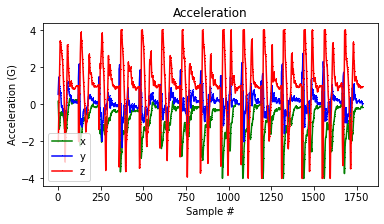

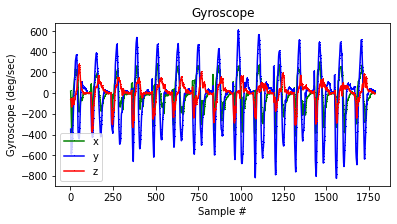

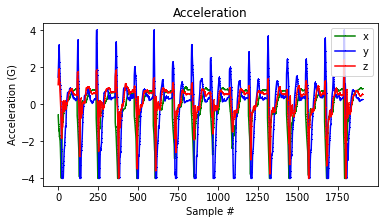

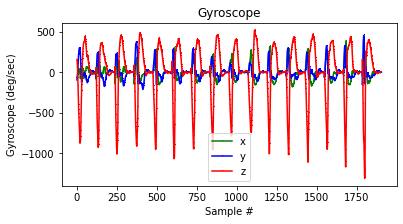

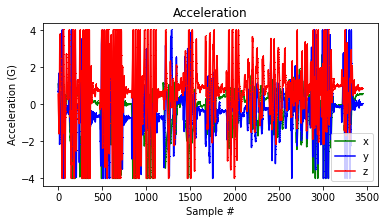

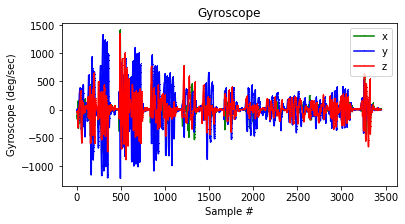

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "cross.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (6,3)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


filename = "hammer.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (6,3)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


filename = "random.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (6,3)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "cross",
    "hammer",
    "random"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.8.0

Processing index 0 for gesture 'cross'.
	There are 15 recordings of the cross gesture.
Processing index 1 for gesture 'hammer'.
	There are 16 recordings of the hammer gesture.
Processing index 2 for gesture 'random'.
	There are 29 recordings of the random gesture.
Data set parsing and preparation complete.


## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [ ]:
# build the model
#Sequential model

model = tf.keras.Sequential(
[
tf.keras.layers.Dense(15, activation='relu'),
tf.keras.layers.Dense(10, activation='relu'),# relu is used for performance
#tf.keras.layers.Dense(5, activation='relu'),
tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'),
 
 ]
 ) # softmax is used, because we only expect one gesture to occur per input


Optimized learning rate 

In [ ]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [ ]:
history= model.fit(inputs_train, outputs_train, epochs=50, batch_size=2, validation_data=(inputs_validate, outputs_validate))

Epoch 1/50
18/18 [==============================] - 1s 27ms/step - loss: 0.2121 - accuracy: 0.5833 - val_loss: 0.2007 - val_accuracy: 0.3333
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 0.1981 - accuracy: 0.5833 - val_loss: 0.2302 - val_accuracy: 0.3333
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.1882 - accuracy: 0.5833 - val_loss: 0.2177 - val_accuracy: 0.3333
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.1645 - accuracy: 0.5833 - val_loss: 0.2076 - val_accuracy: 0.3333
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.1502 - accuracy: 0.5833 - val_loss: 0.1782 - val_accuracy: 0.3333
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.1405 - accuracy: 0.5833 - val_loss: 0.1554 - val_accuracy: 0.4167
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.1250 - accuracy: 0.6667 - val_loss: 0.1514 - val_accuracy: 0.8333
Epoch 8/50
18/18 [

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2, 15)                   10725     
                                                                 
 dense_1 (Dense)             (2, 10)                   160       
                                                                 
 dense_2 (Dense)             (2, 3)                    33        
                                                                 
Total params: 10,918
Trainable params: 10,918
Non-trainable params: 0
_________________________________________________________________


## Verify 

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

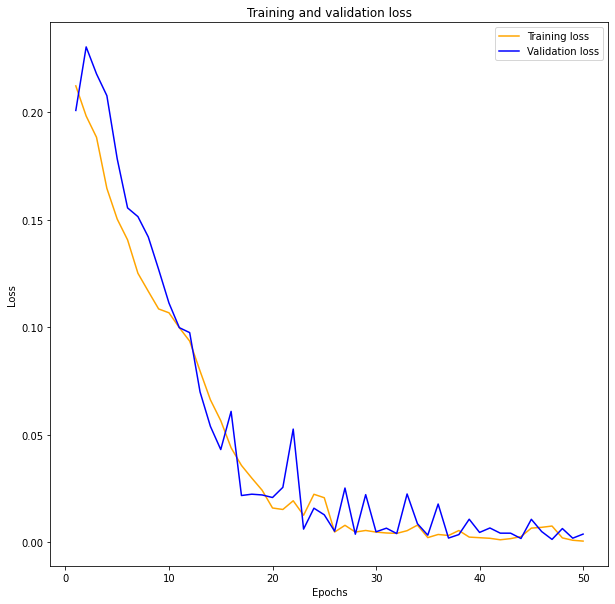

[10.0, 10.0]


In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (10,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

Graph the same data as the previous code cell, but start at index 40 so we can further zoom in once the model starts to converge.

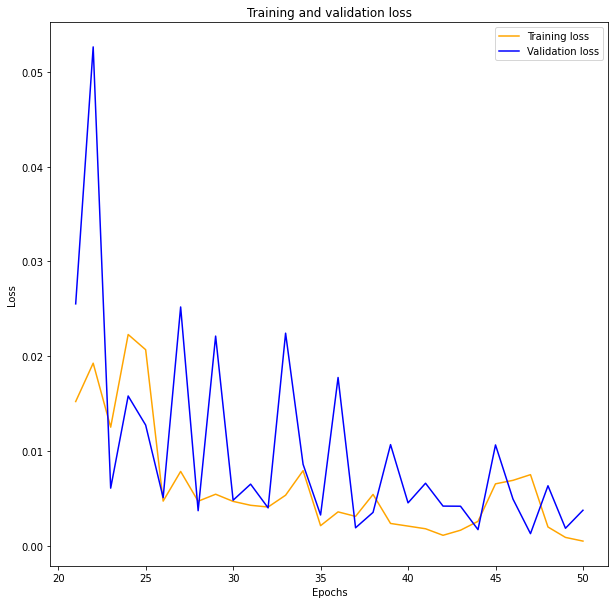

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 20
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(epochs[SKIP:], loss[SKIP:], 'orange', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


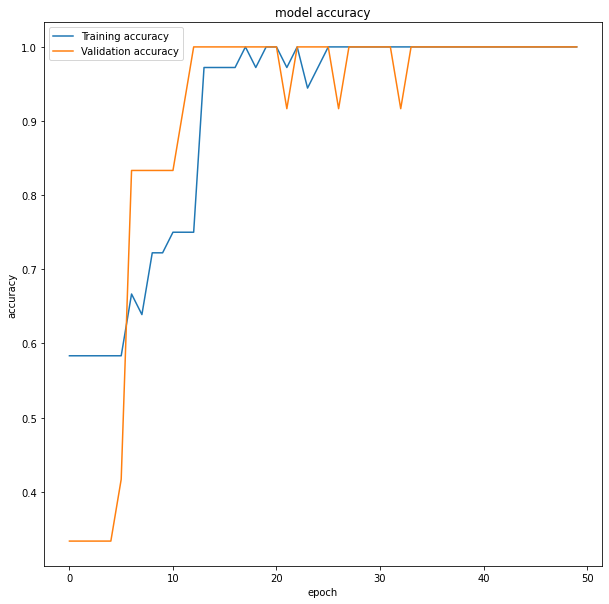

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

### Run with Test Data
Put our test data into the model and plot the predictions


predictions =
 [[0.258 0.021 0.721]
 [0.963 0.016 0.021]
 [0.908 0.034 0.058]
 [0.017 0.975 0.007]
 [0.002 0.001 0.997]
 [0.009 0.986 0.005]
 [0.015 0.98  0.006]
 [0.921 0.033 0.046]
 [0.037 0.933 0.03 ]
 [0.002 0.003 0.995]
 [0.004 0.018 0.978]
 [0.967 0.011 0.022]]
actual =
 [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  del sys.path[0]


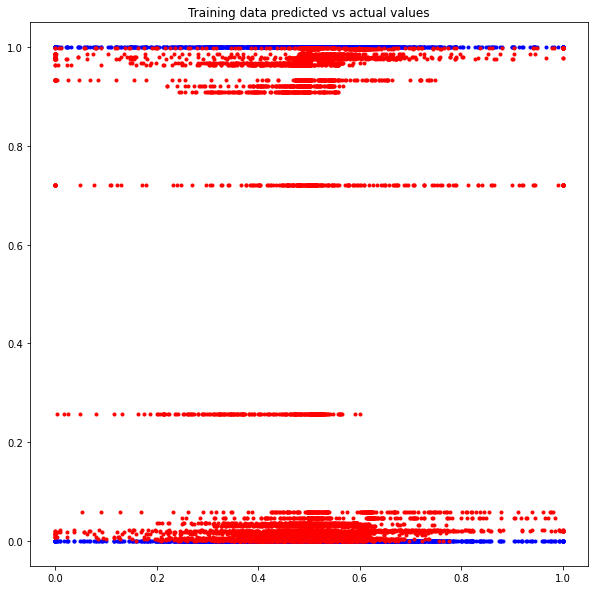

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.rcParams["figure.figsize"] = (10,10)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

###Obtain confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_ground = np.argmax(outputs_test, axis=1)
y_test= np.argmax(predictions, axis=1)

In [ ]:
cm=confusion_matrix(y_ground, y_test)

In [ ]:
print("Confusion Matrix: ")
print(cm)


Confusion Matrix: 
[[4 0 0]
 [0 4 0]
 [0 0 4]]


In [ ]:
cm = confusion_matrix(y_true=y_ground, y_pred=y_test, normalize='true')
print(cm)



[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


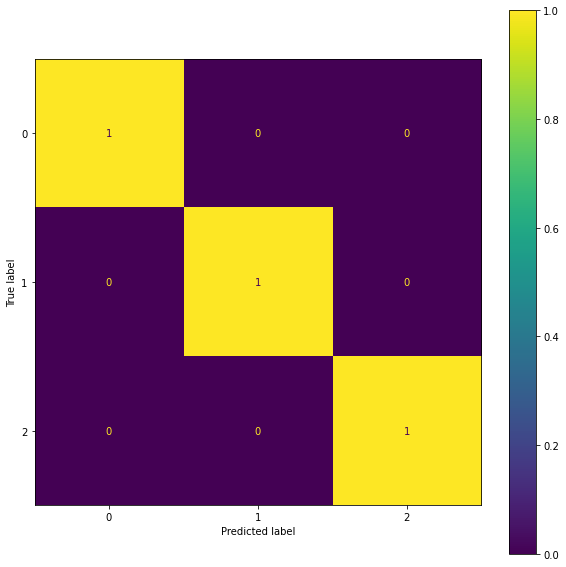

In [ ]:
# Draw Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lables=['cross', 'hammer', 'random']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ground, y_test)

1.0

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /tmp/tmpj1by3kaq/assets


Model is 45496 bytes


## Encode the Model in an Arduino Header File 

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [953 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.lau

# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
